<a href="https://colab.research.google.com/github/cseaboys/dl/blob/main/e3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
import keras_tuner as kt
import matplotlib.pyplot as plt

In [46]:
# Data Loading and Preprocessing
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [47]:
# Model Builder Function
def build_model(hp):
    model = keras.Sequential([
        keras.Input(shape=(32, 32, 3)),
        keras.layers.Conv2D(
            filters=hp.Choice('filters', [32, 64]),
            kernel_size=3, activation='relu'
        ),
        keras.layers.MaxPooling2D(),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=hp.Int('units', 64, 128, step=32), activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [48]:
#  Tuner Setup
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=3,
                        directory='.',
                        project_name='cifar10_tune_final_blocks')

Reloading Tuner from ./cifar10_tune_final_blocks/tuner0.json


In [49]:
# Hyperparameter Search
tuner.search(x_train, y_train,
             validation_split=0.2,
             epochs=5,
             verbose=1)

In [50]:
# Trial Results Summary
print("Trial results summary")
for trial in tuner.oracle.get_best_trials(num_trials=3):
    val_loss = trial.metrics.get_last_value('val_loss')
    print(f"Trial {trial.trial_id} -> "
          f"Val Acc: {trial.score:.4f}, "
          f"Val Loss: {val_loss:.4f}")

Trial results summary
Trial 0 -> Val Acc: 0.6309, Val Loss: 1.0918
Trial 1 -> Val Acc: 0.6251, Val Loss: 1.0916
Trial 2 -> Val Acc: 0.6202, Val Loss: 1.1164


In [51]:
#  Best Trial Identification
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
print(f"\n-> Best model found in Trial {best_trial.trial_id} "
      f"with Validation Accuracy: {best_trial.score:.4f}")


-> Best model found in Trial 0 with Validation Accuracy: 0.6309


In [52]:
# Best Model Retrieval and Setup for Prediction
best_model = tuner.get_best_models(num_models=1)[0]

In [53]:
# Prediction on Test Data
preds = best_model.predict(x_test[:5])
pred_labels = np.argmax(preds, axis=1)
true_labels = y_test[:5].flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


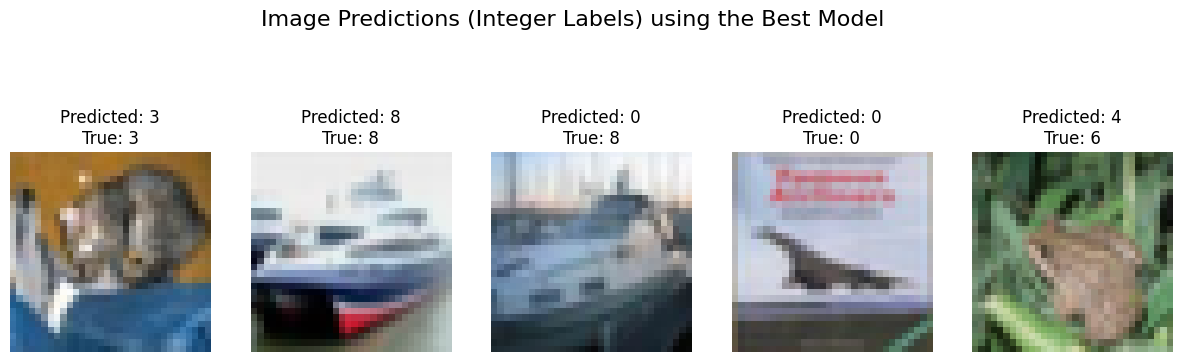

In [54]:
#  Image Visualization
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')
    pred_label = pred_labels[i]
    true_label = true_labels[i]
    plt.title(f"Predicted: {pred_label}\nTrue: {true_label}")

plt.suptitle("Image Predictions (Integer Labels) using the Best Model", fontsize=16)
plt.show()